In [14]:
import pandas as pd
from sklearn import linear_model

In [5]:
df_canada_pci = pd.read_csv('Sampledata/canada_per_capita_income.txt')
df_canada_pci.head()


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [6]:
import matplotlib.pyplot as plt

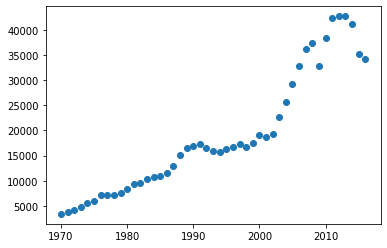

In [8]:
plt.scatter(df_canada_pci['year'], df_canada_pci['per capita income (US$)'])

In [10]:
reg = linear_model.LinearRegression()
reg.fit(df_canada_pci[['year']], df_canada_pci[['per capita income (US$)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.coef_

array([[828.46507522]])

In [12]:
reg.intercept_

array([-1632210.75785546])

In [27]:
reg.predict([[2020]])

array([[41288.69409442]])

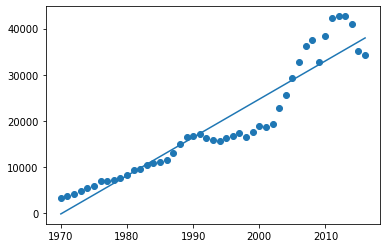

In [19]:
plt.scatter(df_canada_pci['year'], df_canada_pci['per capita income (US$)'])
plt.plot(df_canada_pci['year'], reg.predict(df_canada_pci[['year']]))

In [3]:
# Multi Variate LR
import pandas as pd
#load the test data
df_hiring = pd.read_csv('Sampledata/hiring.txt')
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df_hiring['experience'].fillna('Zero',  inplace=True)
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
from word2number import w2n

In [8]:
df_hiring['experience']=df_hiring['experience'].apply(w2n.word_to_num)

In [9]:
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [11]:
test_score_median = df_hiring['test_score(out of 10)'].median()

In [13]:
df_hiring['test_score(out of 10)'].fillna(test_score_median, inplace=True)
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [15]:
reg_mv = linear_model.LinearRegression()

In [17]:
reg_mv.fit(df_hiring[['experience','test_score(out of 10)','interview_score(out of 10)']],df_hiring['salary($)'] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
reg_mv.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [19]:
reg_mv.intercept_

17737.26346433768

In [20]:
reg_mv.predict([[2,9,6]])

array([53205.96797671])

In [21]:
reg_mv.predict([[12, 10,10]])

array([92002.18340611])